Importation des bibliothèques nécessaires

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Chargement des données

In [2]:
df = pd.read_csv("C:/Users/MALAK/OneDrive/Bureau/satisfaction-app/backend/data/train.csv")
print(df.head())

   Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                

Suppression des lignes avec valeurs manquantes faibles

In [3]:
print(df.isna().sum())

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [4]:
threshold = len(df)*0.05
cols_to_drop = df.columns[df.isna().sum()<=threshold]
df.dropna(subset=cols_to_drop, inplace=True)
df.isna().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [5]:
print(f"Duplicated rows: {df.duplicated().sum()}")

Duplicated rows: 0


Conversion de types

In [6]:
df["Arrival Delay in Minutes"] = df["Arrival Delay in Minutes"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103594 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Unnamed: 0                         103594 non-null  int64 
 1   id                                 103594 non-null  int64 
 2   Gender                             103594 non-null  object
 3   Customer Type                      103594 non-null  object
 4   Age                                103594 non-null  int64 
 5   Type of Travel                     103594 non-null  object
 6   Class                              103594 non-null  object
 7   Flight Distance                    103594 non-null  int64 
 8   Inflight wifi service              103594 non-null  int64 
 9   Departure/Arrival time convenient  103594 non-null  int64 
 10  Ease of Online booking             103594 non-null  int64 
 11  Gate location                      103594 non-null  int64

Visualisation des variables qualitatives liées au vol

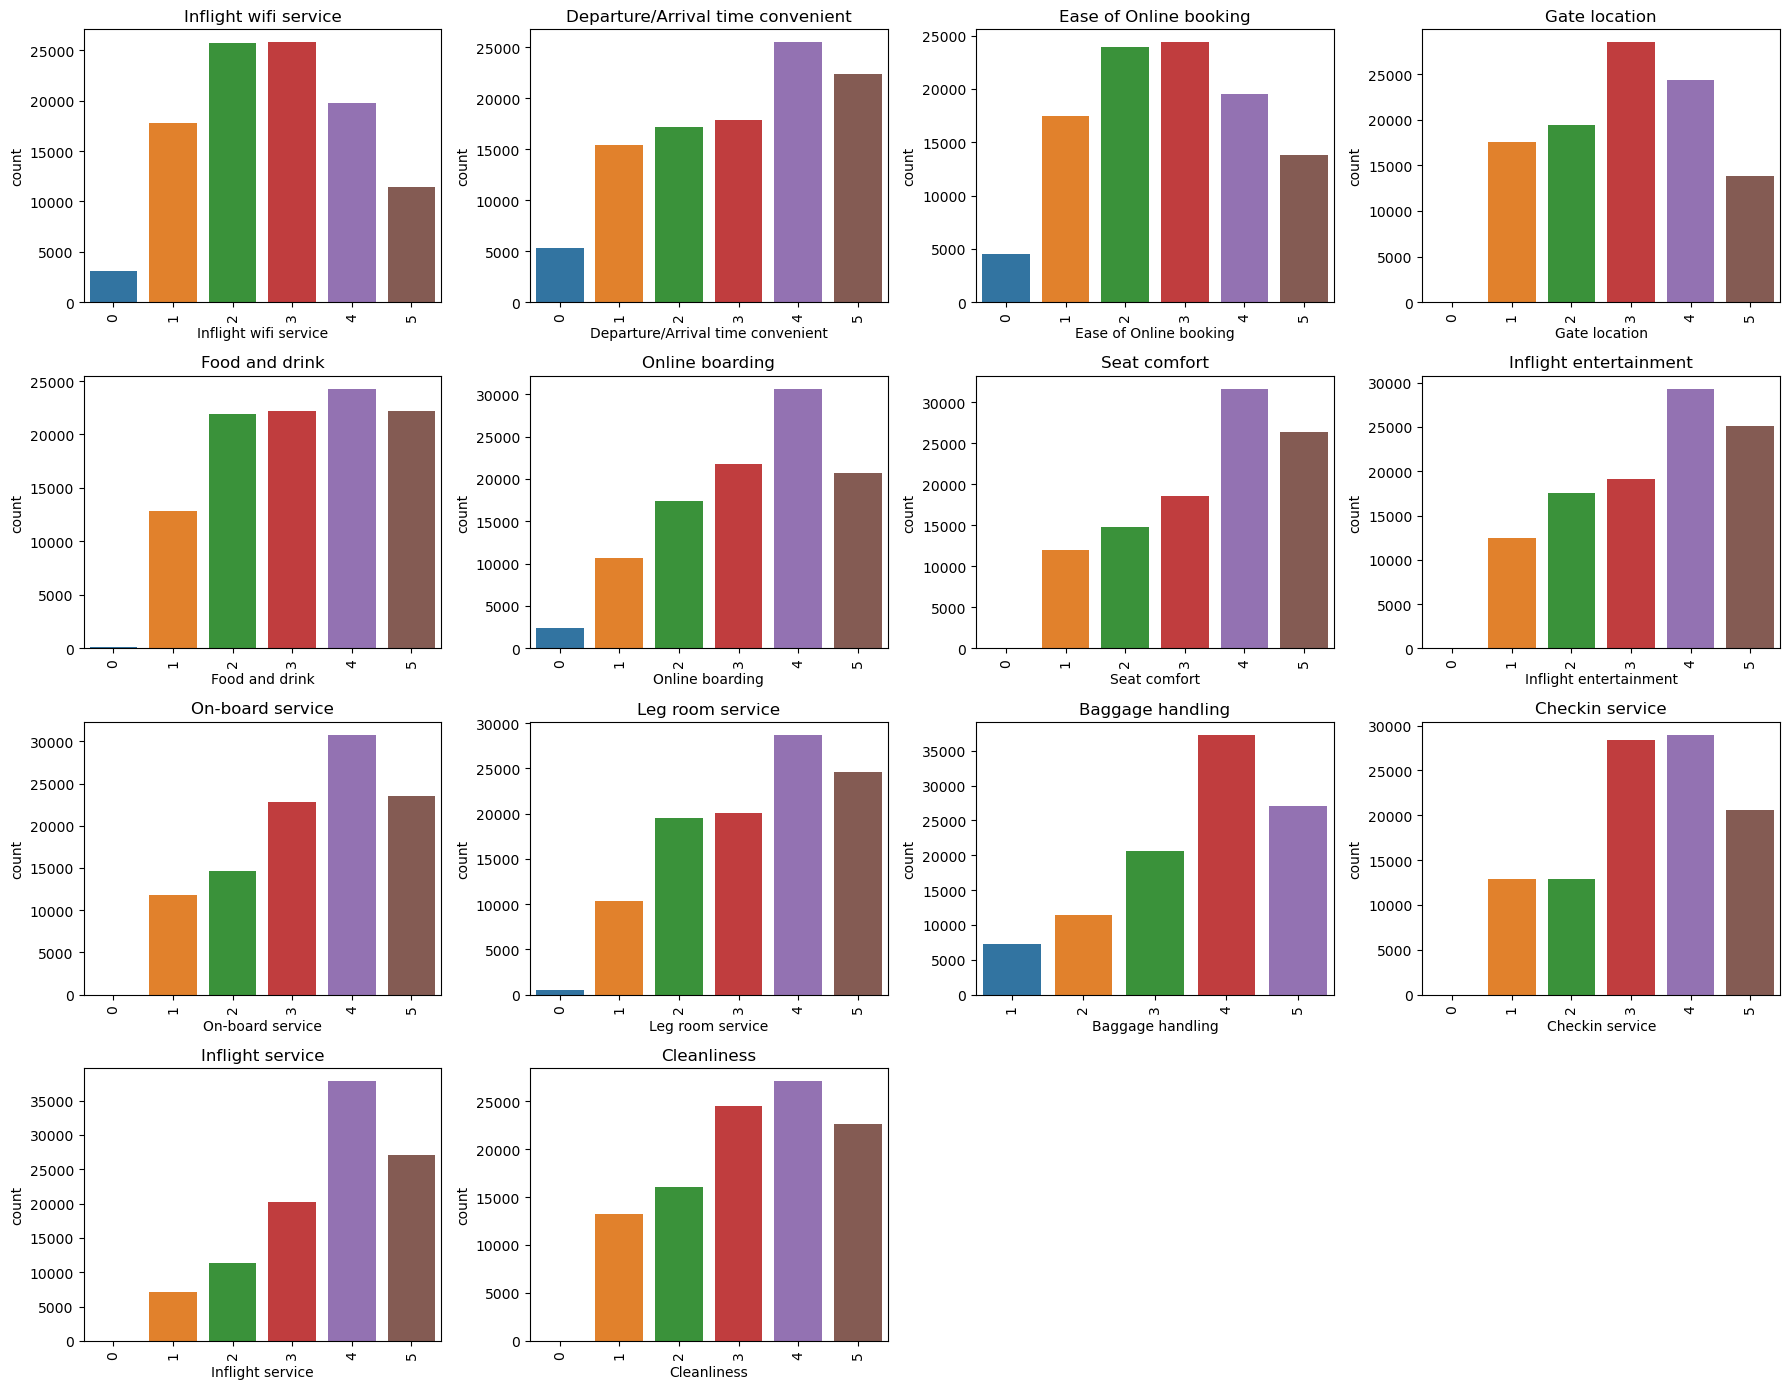

In [7]:
cols= ['Inflight wifi service','Departure/Arrival time convenient', 'Ease of Online booking','Gate location', 'Food and drink', 
       'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service','Baggage handling', 
       'Checkin service', 'Inflight service','Cleanliness']

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18, 14))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=90)

for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Aperçu statistique

In [8]:
print(df[['Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Flight Distance', 'Age']].describe())

       Departure Delay in Minutes  Arrival Delay in Minutes  Flight Distance  \
count               103594.000000             103594.000000    103594.000000   
mean                    14.747939                 15.178678      1189.325202   
std                     38.116737                 38.698682       997.297235   
min                      0.000000                  0.000000        31.000000   
25%                      0.000000                  0.000000       414.000000   
50%                      0.000000                  0.000000       842.000000   
75%                     12.000000                 13.000000      1743.000000   
max                   1592.000000               1584.000000      4983.000000   

                 Age  
count  103594.000000  
mean       39.380466  
std        15.113125  
min         7.000000  
25%        27.000000  
50%        40.000000  
75%        51.000000  
max        85.000000  


Taux de satisfaction global

In [9]:
print(df["satisfaction"].value_counts(normalize=True))

satisfaction
neutral or dissatisfied    0.566606
satisfied                  0.433394
Name: proportion, dtype: float64


# Quels sont les facteurs qui influencent le plus la satisfaction ?

Analyse satisfaction par type client

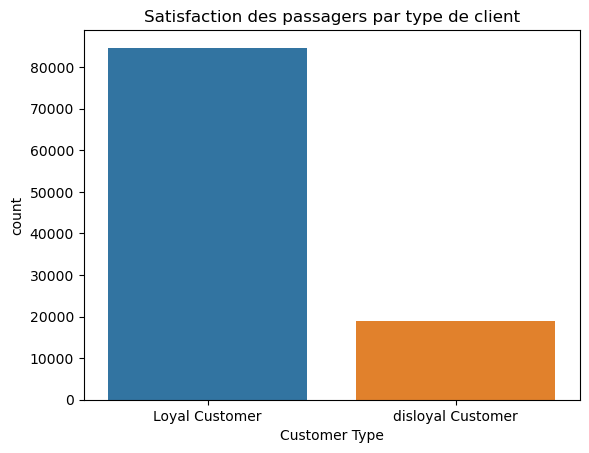

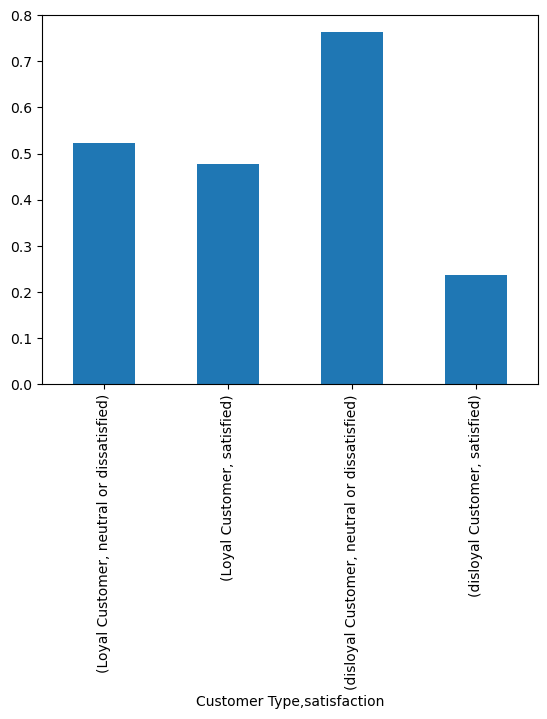

In [10]:
df['Customer Type'].value_counts()
sns.countplot(x="Customer Type", data=df)
plt.title("Satisfaction des passagers par type de client")
plt.show()
satisfaction_by_Customer_Type = df.groupby('Customer Type')['satisfaction'].value_counts(normalize=True)
satisfaction_by_Customer_Type.plot(kind="bar")
plt.show()

loyal cust>>>disloyal customer and and 0.75% of disloyal customer are not satisfied

Analyse satisfaction par tranche d'âge

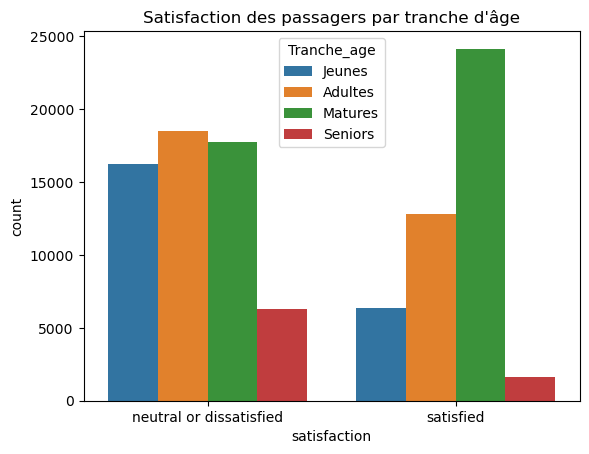

C:\Users\MALAK\AppData\Local\Temp\ipykernel_7720\3253259003.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  satisfaction_by_tranche_age = df.groupby('Tranche_age')['satisfaction'].value_counts(normalize=True)


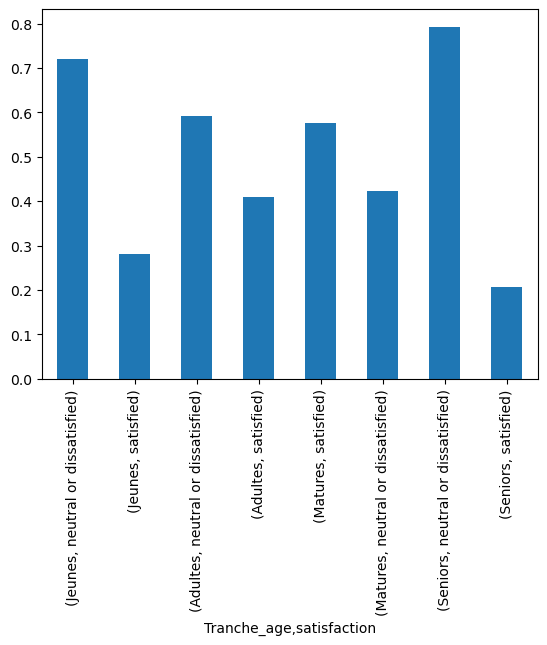

In [11]:
df['Tranche_age'] = pd.cut(df['Age'], bins=[0, 25, 40, 60, 100], 
                           labels=['Jeunes', 'Adultes', 'Matures', 'Seniors'])
sns.countplot(x="satisfaction", data=df, hue="Tranche_age")
plt.title("Satisfaction des passagers par tranche d'âge")
plt.show()
satisfaction_by_tranche_age = df.groupby('Tranche_age')['satisfaction'].value_counts(normalize=True)
satisfaction_by_tranche_age.plot(kind="bar")
plt.show()

mature people are satisfied and jeunes and seniors are not

Analyse satisfaction par genre

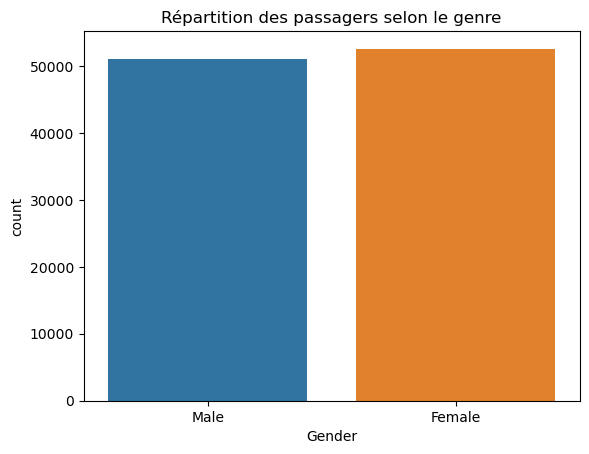

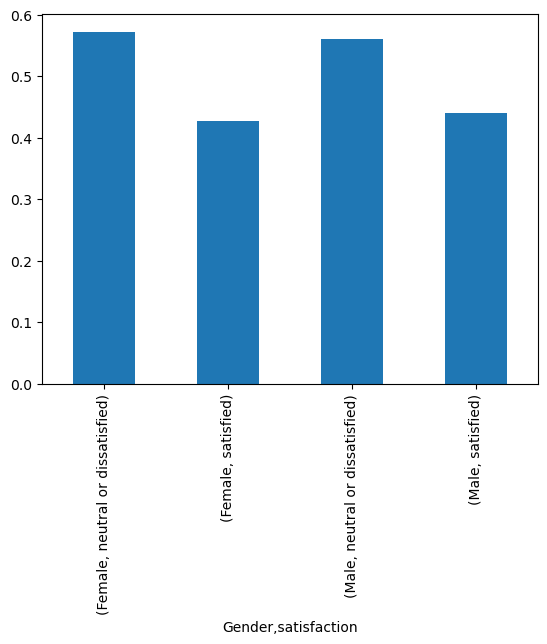

In [12]:
df['Gender'].value_counts(normalize=True) * 100  # en %
sns.countplot(x='Gender', data=df)
plt.title("Répartition des passagers selon le genre")
plt.show()
satisfaction_by_gender = df.groupby('Gender')['satisfaction'].value_counts(normalize=True)
satisfaction_by_gender.plot(kind="bar")
plt.show()

equally balance => does not interfere

Analyse satisfaction par classe

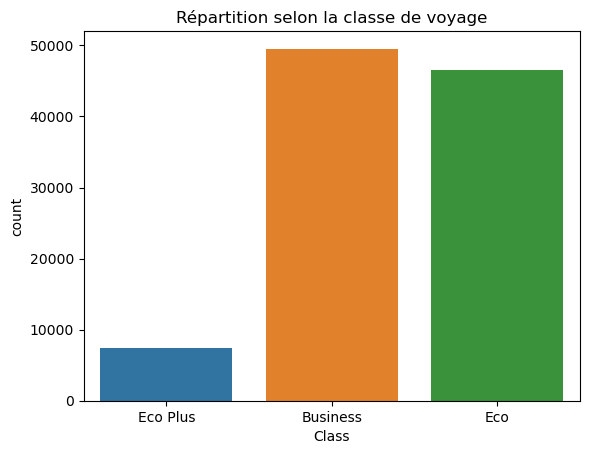

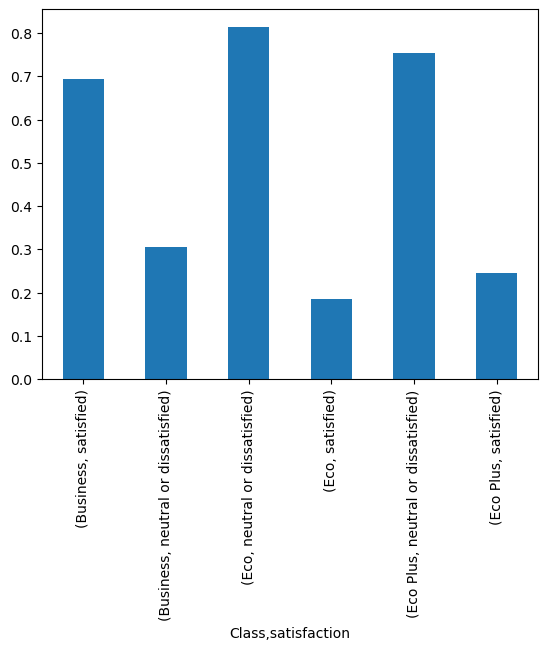

In [13]:
df['Class'].value_counts(normalize=True) * 100
sns.countplot(x='Class', data=df)
plt.title("Répartition selon la classe de voyage")
plt.show()
satisfaction_by_class = df.groupby('Class')['satisfaction'].value_counts(normalize=True)
satisfaction_by_class.plot(kind="bar")
plt.show()

buisness class are satisfied but others are not

Analyse satisfaction par type de voyage

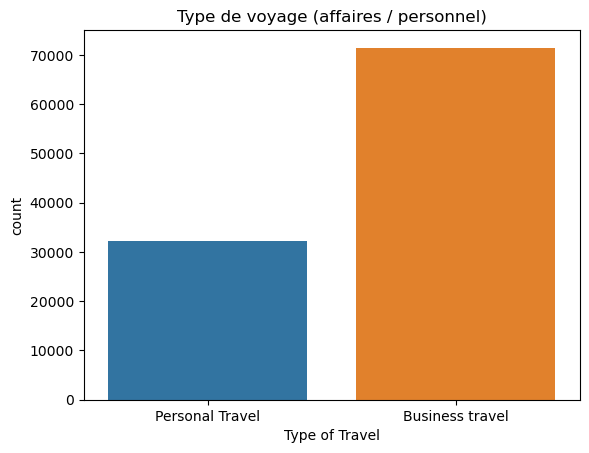

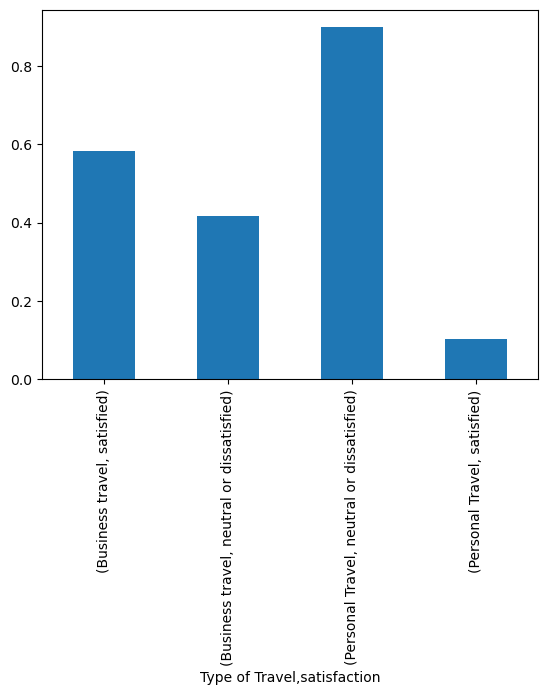

In [14]:
df['Type of Travel'].value_counts(normalize=True) * 100
sns.countplot(x='Type of Travel', data=df)
plt.title("Type de voyage (affaires / personnel)")
plt.show()
satisfaction_by_type = df.groupby('Type of Travel')['satisfaction'].value_counts(normalize=True)
satisfaction_by_type.plot(kind="bar")
plt.show()

buisness travel are bigger number and are satisfied while personol not satisfied

# Y a-t-il des profils types de passagers insatisfaits ?
Profils types insatisfaits : seniors, jeunes, voyages personnels, pas business class

Visualisation des outliers

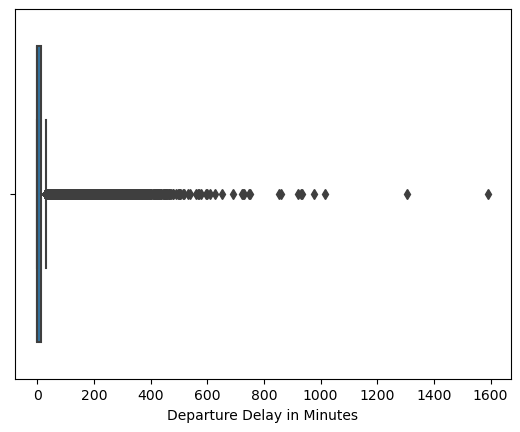

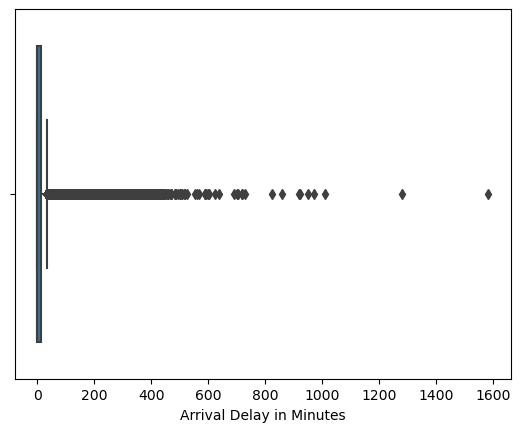

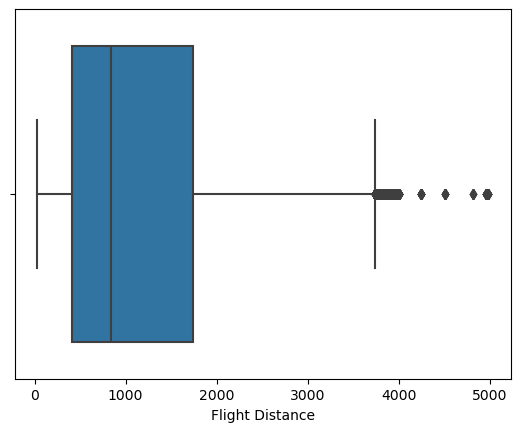

In [15]:
for col in ["Departure Delay in Minutes",  "Arrival Delay in Minutes",  "Flight Distance"]:
    sns.boxplot(data=df, x=col)
    plt.show()

Encodage des variables catégorielles importantes

In [16]:
dummies = pd.get_dummies(df[["satisfaction","Customer Type",'Type of Travel','Class']]).astype(int)
df = pd.concat([df,dummies],axis=1)

Suppression des colonnes inutiles ou redondantes

In [17]:
df = df.drop(['Unnamed: 0', 'id', "Gender", "Customer Type", 'Type of Travel', 'Class',"satisfaction","Type of Travel_Personal Travel","Customer Type_disloyal Customer","satisfaction_neutral or dissatisfied"],axis=1)

Heatmap de corrélation

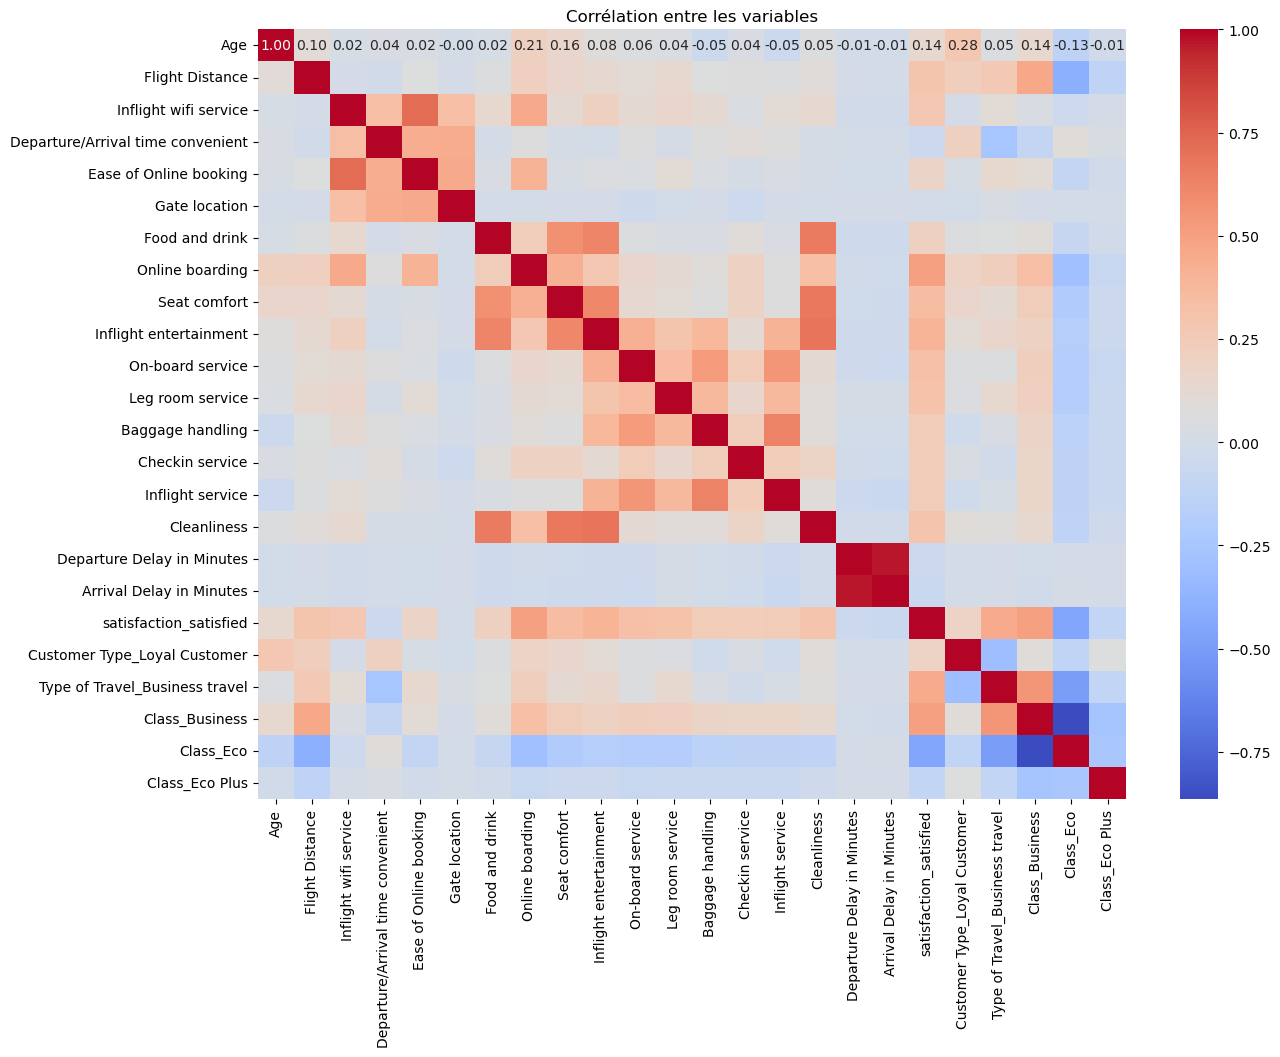

In [18]:
plt.figure(figsize=(14,10))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Corrélation entre les variables")
plt.show()

Standardisation des variables numériques continues

In [19]:
cols_to_scale = ['Age', 'Flight Distance']
scaler = StandardScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

Sélection des features et de la cible (selon corrélation + métier)

In [20]:
X = df[['Age', 'Class_Business', 'Class_Eco Plus', 'Class_Eco', 'Type of Travel_Business travel', 'Customer Type_Loyal Customer',
     'Flight Distance', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service',
     'Cleanliness']]

y = df["satisfaction_satisfied"]

Séparation des données pour l’entraînement

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6, stratify=y)


choisir meilleur k pour knn model

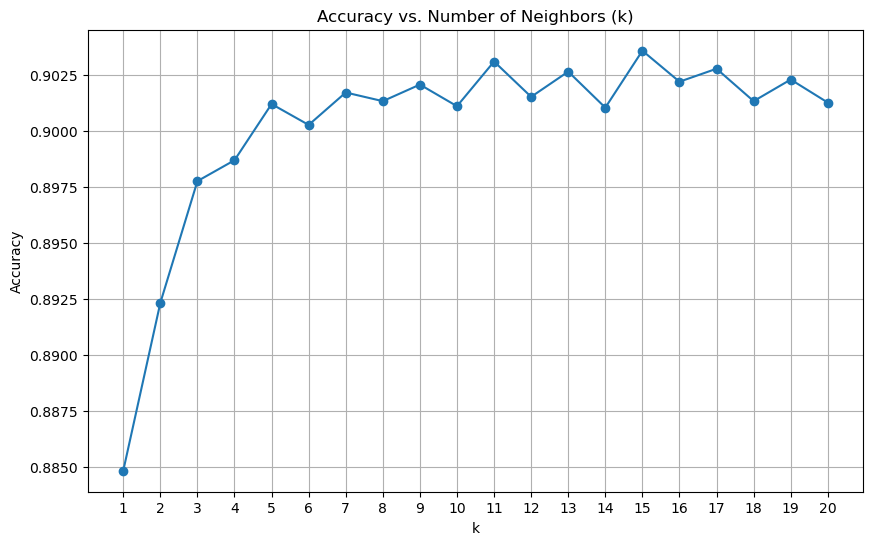

In [22]:
k_range = range(1, 21)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

# Plot
plt.figure(figsize=(10,6))
plt.plot(k_range, scores, marker='o')
plt.title("Accuracy vs. Number of Neighbors (k)")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.xticks(k_range)
plt.grid()
plt.show(block=False)

In [23]:
best_k = k_range[scores.index(max(scores))]
print(f"✅ Best k: {best_k} with accuracy: {max(scores):.4f}")

✅ Best k: 15 with accuracy: 0.9036
